# A magical day in Disney with Machine Learning — Part 5 Logistic Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

hp_ohe = pd.read_csv("harryPotterCleanOHE.csv")
hp_oe = pd.read_csv("harryPotterCleanOE.csv")
hp_me = pd.read_csv("harryPotterClean.csv")

def getXandY(df):
    df.drop(df.tail(20).index,inplace=True) 
    x = df.drop(['Harry_Potter_and_the_Forbidden','Unnamed: 0'],axis=1)
    y = df.Harry_Potter_and_the_Forbidden
    return(x,y)

def trainTest(x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, shuffle=True)
    return(X_train, X_test, y_train, y_test)

In [2]:
x,y=getXandY(hp_me)
X_train, X_test, y_train, y_test = trainTest(x,y)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logisticRegr = LogisticRegression(max_iter=20000)
logisticRegr.fit(X_train, y_train)
y_pred=logisticRegr.predict(X_test)

Accuracy: 0.25137420718816067
Precision: 0.16843006581105416
Recall: 0.25137420718816067
F1: 0.17778137878908587


/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


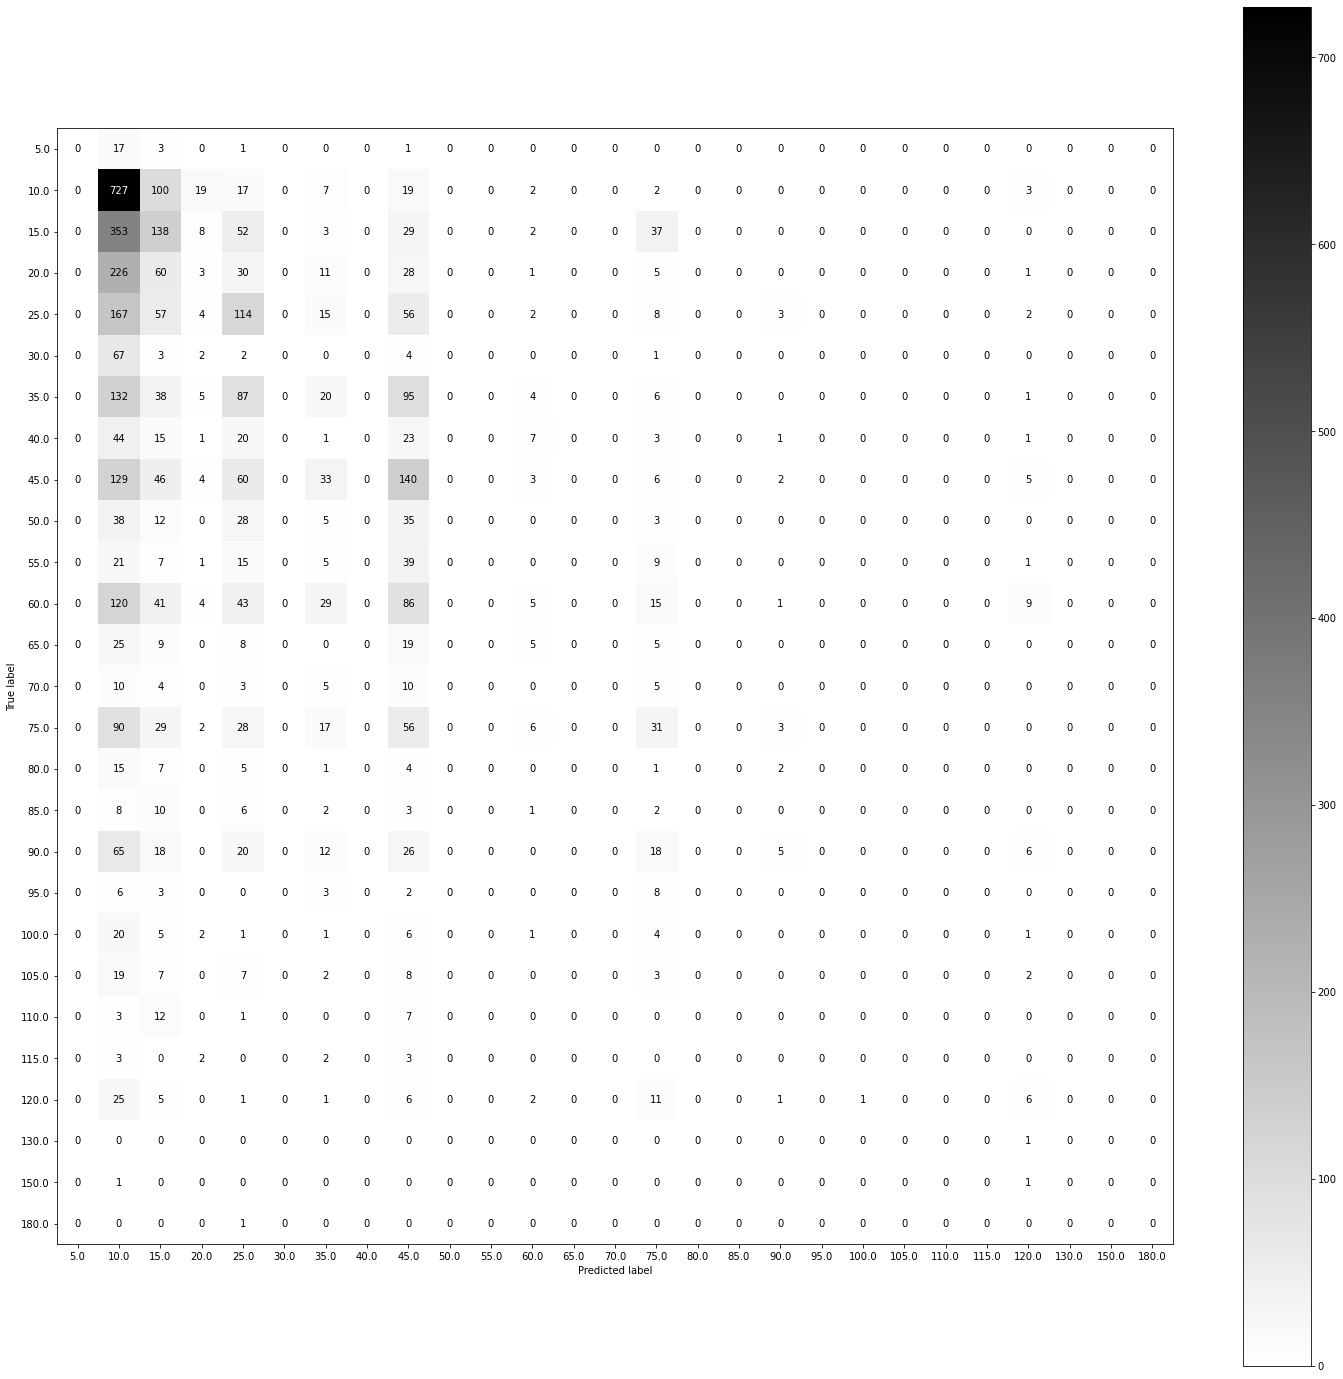

In [21]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

plt.rcParams['font.size'] = '10'
fig, ax = plt.subplots(figsize=(25,25))
plot_confusion_matrix(logisticRegr, X_test, y_test,cmap='binary',ax=ax) 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='weighted'))
print("F1:",metrics.f1_score(y_test, y_pred, average='weighted'))

### ROC Curve

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import numpy
import sys
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

np.sort(y_test.unique())

array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110.,
       115., 120., 130., 150., 180.])

In [28]:
y_test_bin = label_binarize(y_test, classes=[  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105., 110.,
       115., 120., 130., 150., 180.])

y_pred_proba = logisticRegr.predict_proba(X_test)
y_pred_proba2= np.delete(y_pred_proba, numpy.s_[27:], axis=1)

In [29]:
y_test_bin

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 1, 

In [30]:
# Compute ROC curve and ROC area for each class
macro_roc_auc_ovo = roc_auc_score(y_test_bin, y_pred_proba2, multi_class="ovo",average='weighted')
macro_roc_auc_ovr = roc_auc_score(y_test_bin, y_pred_proba2, multi_class="ovr",average='weighted')

In [31]:
macro_roc_auc_ovo

0.5926465961628268

In [32]:
macro_roc_auc_ovr

0.5926465961628268

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         5.0       0.00      0.00      0.00        22
        10.0       0.31      0.81      0.45       896
        15.0       0.22      0.22      0.22       622
        20.0       0.05      0.01      0.01       365
        25.0       0.21      0.27      0.23       428
        30.0       0.00      0.00      0.00        79
        35.0       0.11      0.05      0.07       388
        40.0       0.00      0.00      0.00       116
        45.0       0.20      0.33      0.25       428
        50.0       0.00      0.00      0.00       121
        55.0       0.00      0.00      0.00        98
        60.0       0.12      0.01      0.03       353
        65.0       0.00      0.00      0.00        71
        70.0       0.00      0.00      0.00        37
        75.0       0.17      0.12      0.14       262
        80.0       0.00      0.00      0.00        35
        85.0       0.00      0.00      0.00        32
        90.0       0.28    

/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rodrigoledesmagarces/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=27
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["weighted"], tpr["weighted"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba2.ravel())
roc_auc["weighted"] = auc(fpr["weighted"], tpr["weighted"])

In [ ]:
plt.figure()
lw = 1
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve"
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()


In [ ]:
time_counts = pd.DataFrame(hp_me['Harry_Potter_and_the_Forbidden'].value_counts())

In [ ]:
time_counts['Harry_Potter_and_the_Forbidden']

In [ ]:
data = {'time':[  0,	5,	10,	11,	15,	20,	25,	30,	35,	40,	45,	50,	55,	60,	65,	70,	75,	80,	85,	90,	95,	100,	105,	110,	115,	120,	125,	130,	135,	145,	150,	180,],
        'count':[1,	66,	2922,	1,	2078,	1258,	1447,	249,	1323,	437,	1391,	399,	301,	1148,	222,	115,	886,	113,	115,	614,	75,	144,	138,	76,	28,	196,	2,	1,	3,	1,	10,	5,]}
df=pd.DataFrame(data)
df

In [ ]:
y = hp_me.Harry_Potter_and_the_Forbidden



fig, ax = plt.subplots(figsize =(10, 7))
bins = [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55, 60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 
        110, 115, 120, 135, 150, 180]
ax.hist(y, bins)
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.6)

plt.show()